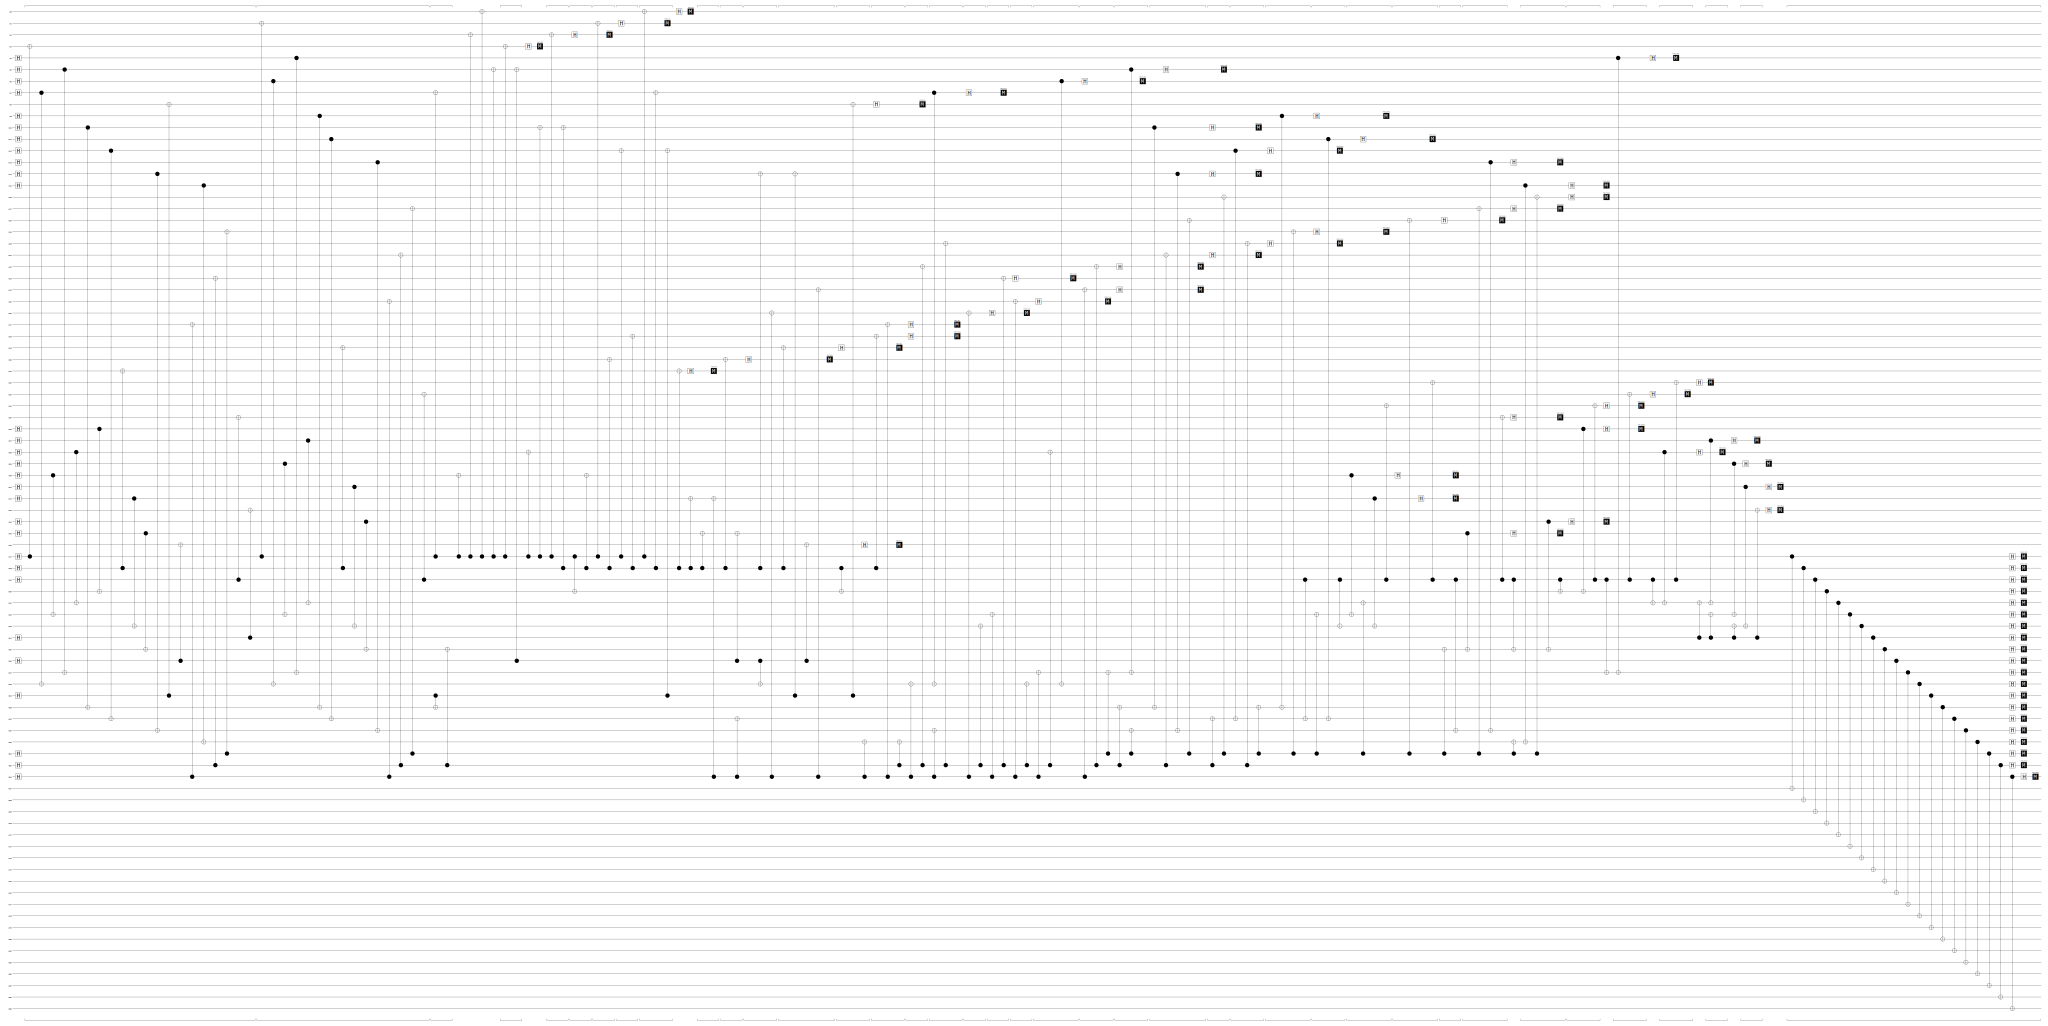

In [1]:
import stimcirq
from cirq.contrib.qasm_import import circuit_from_qasm

with open("TwentyDist6Code.qasm", "r") as file:
    cirq_circuit = circuit_from_qasm(file.read())

stim_circuit = stimcirq.cirq_circuit_to_stim_circuit(cirq_circuit)
stim_circuit.diagram('timeline-svg')


for i in range(20):
    stim_circuit.append("CNOT", [47 + i, 67 + i])

stim_circuit.append("H", range(47, 67))
stim_circuit.append("M", range(47, 67))
stim_circuit.diagram('timeline-svg')

In [2]:
import pyzx as zx
from pyzx.rewrite_rules import remove_id, color_change

zx_circ = zx.qasm(stim_circuit.to_qasm(open_qasm_version=2))
diagram = zx_circ.to_graph()

vs = list(diagram.vertices())
for v in vs:
    if diagram.vertex_degree(v) == 2:
        remove_id(diagram, v)
vs = list(diagram.vertices())
for v in vs:
    if diagram.vertex_degree(v) == 1:
        e = diagram.edge(v, list(diagram.neighbors(v))[0])
        if diagram.edge_type(e) == zx.EdgeType.HADAMARD:
            color_change(diagram, v)
for input in range(67, 86):
    diagram.set_type(input, zx.VertexType.BOUNDARY)

zx.draw(diagram, labels=True)

87


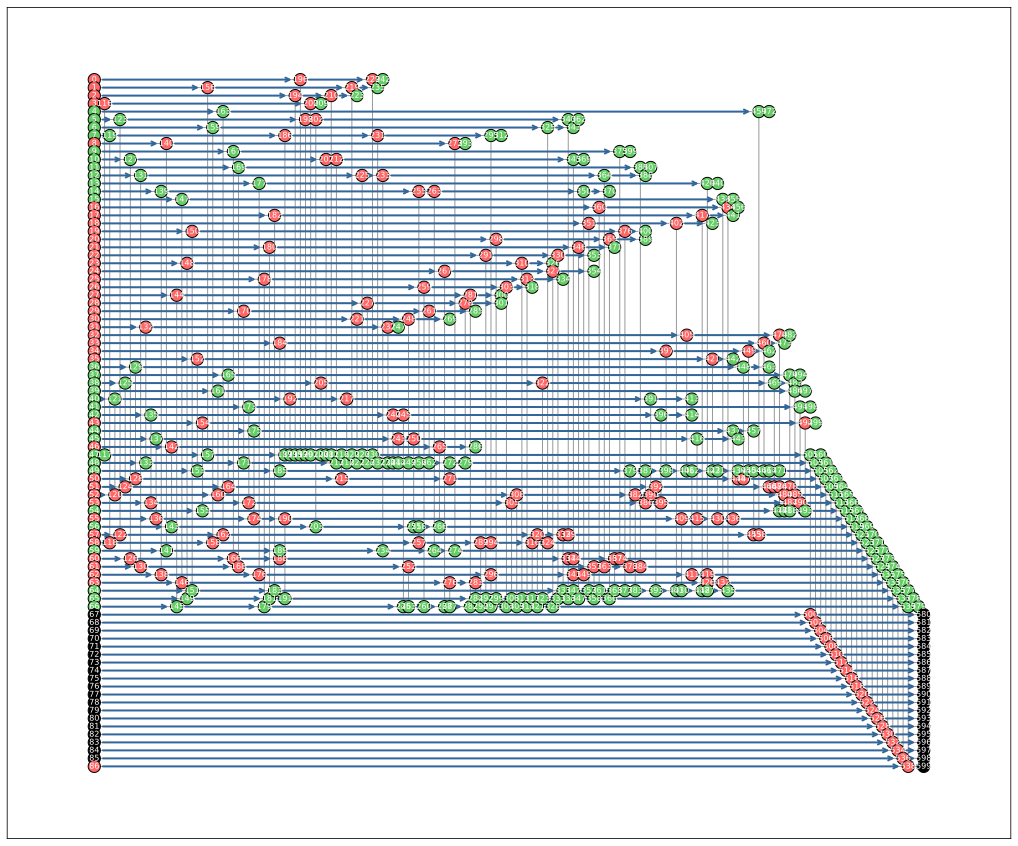

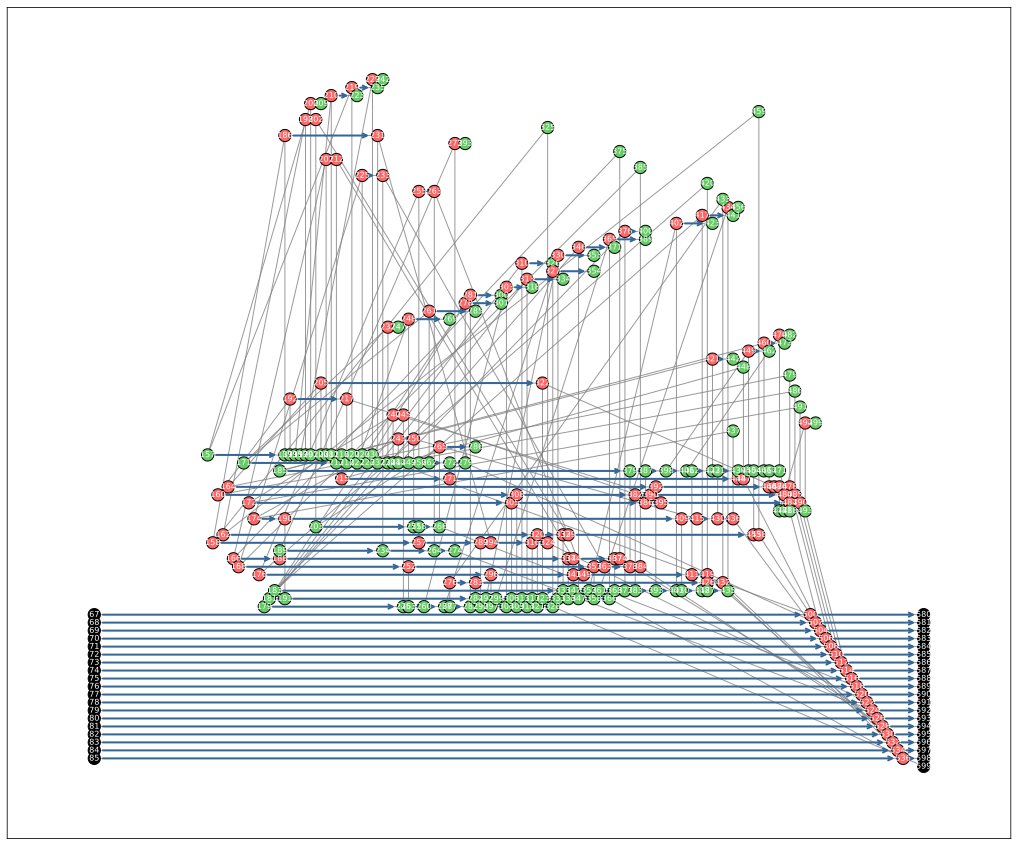

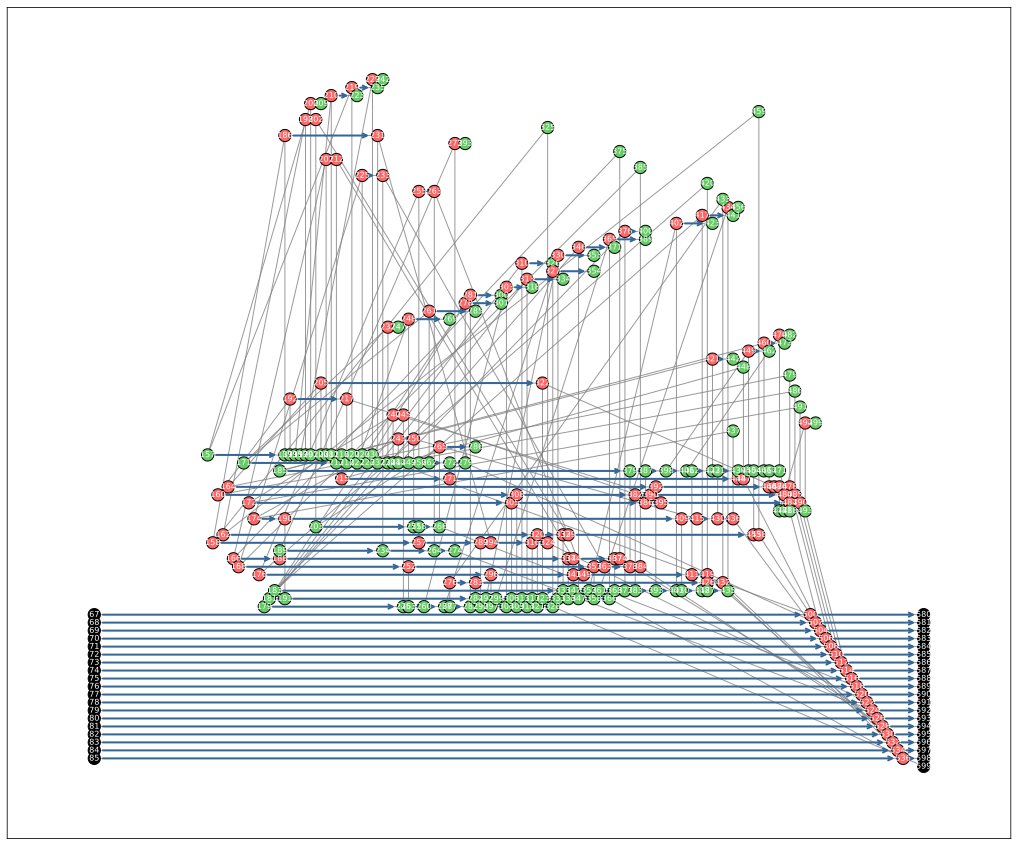

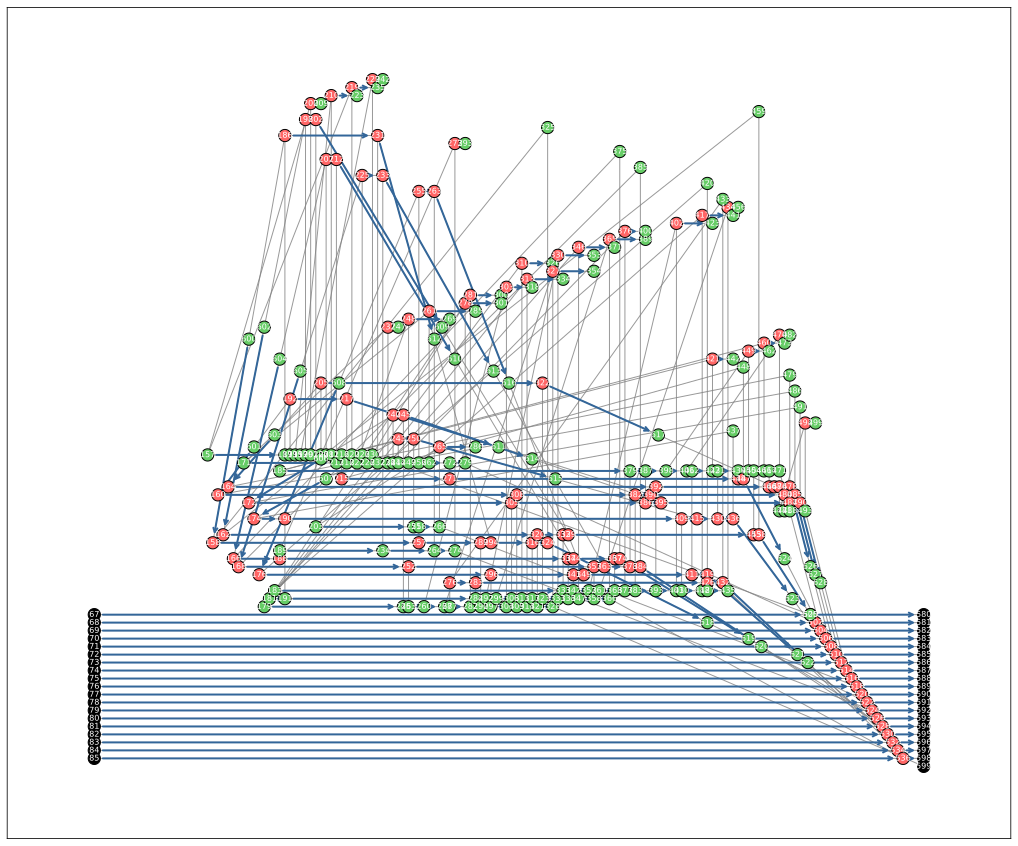

In [6]:
from path_cover_opt import *

cov_graph = CoveredZXGraph.from_zx_diagram(diagram)
print(len(cov_graph.paths))
cov_graph.visualize()

cov_graph.basic_FE_rewrites()
cov_graph.visualize()

# Run Optimization
cov_graph.greedy_path_opt()
cov_graph.visualize()

cov_graph.restore_identity_spiders()
cov_graph.visualize()

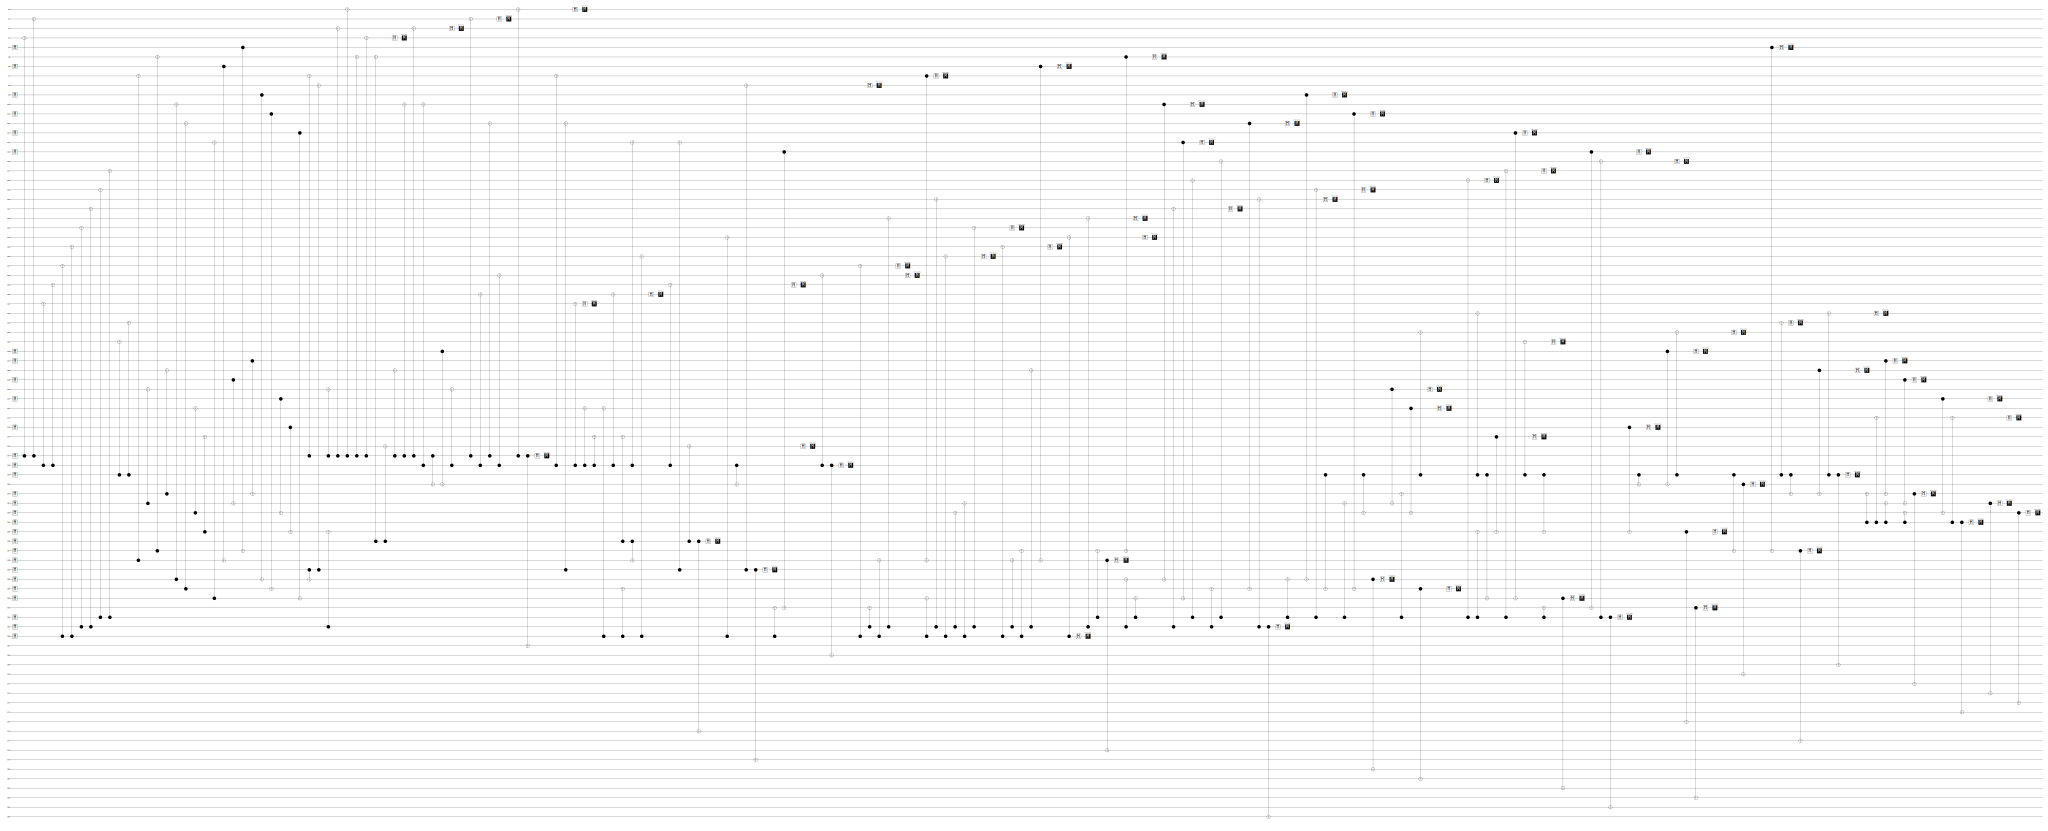

In [8]:
len(cov_graph.paths)
c = cov_graph.extract_circuit()
c.diagram('timeline-svg')